In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn import metrics
import math


In [2]:
df=pd.read_csv(r"C:\Users\Ben\Downloads\output_37.csv")
print(df)
type(df)
print(df.columns.to_list())

        X148912575      X10       Counter.Strike  X76561198363716821   X0  X2  \
0        133699838  1466640              Road 96        7.656120e+16    0   3   
1        133698970  1466640              Road 96        7.656120e+16    0   2   
2        133696974  1466640              Road 96        7.656120e+16    0   2   
3        133684142  1466640              Road 96        7.656120e+16  132  66   
4        133664351  1466640              Road 96        7.656120e+16    0   3   
...            ...      ...                  ...                 ...  ...  ..   
267944   136115726  1509510  Settlement Survival        7.656120e+16    0   8   
267945   136103491  1509510  Settlement Survival        7.656120e+16    0  11   
267946   136003545  1509510  Settlement Survival        7.656120e+16    0   1   
267947   135950443  1509510  Settlement Survival        7.656120e+16   81  20   
267948   135846187  1509510  Settlement Survival        7.656120e+16  602  33   

         X197  X41  X197.1 

In [3]:
df=df
necesary_columns=['X0.1', 'GOAT.Game...']
df=df[necesary_columns]
print(df)
df=df.dropna()

        X0.1                                       GOAT.Game...
0          0  Honestly this game helped me so much and made ...
1          0  Its a nice story driven game about hitchhiking...
2          0  best road trip ever there were moments that ac...
3          0                                good game veryn ice
4          0                                          Its good 
...      ...                                                ...
267944     0  So far its a pretty neat builder that has many...
267945     0  This game is so much fun. I love the tech tree...
267946     0                                      good vibes :)
267947     2  Great game to just chill with, a lot to do and...
267948    22  8.5 / 10 If Banished & Frostpunk had a baby.  ...

[267949 rows x 2 columns]


(-0.5, 399.5, 199.5, -0.5)

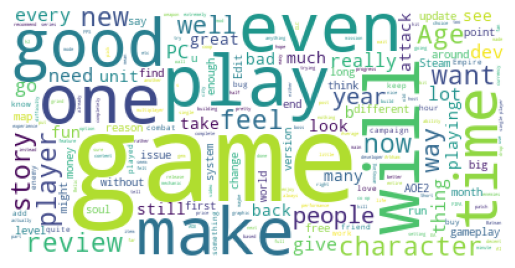

In [4]:

df0 = df[df['X0.1'] > 500]
df0=df0['GOAT.Game...']
text0= ''
for line in df0[0:10000]:
    text0 +=str(line) + " "
    #print(text0)
wordcloud0=WordCloud(background_color='white').generate(text0)
plt.imshow(wordcloud0)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

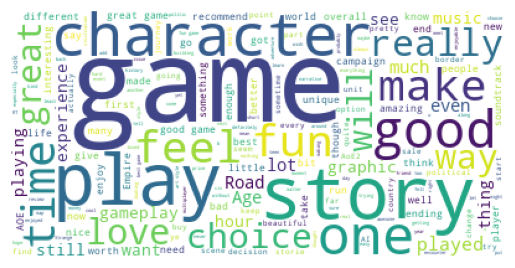

In [5]:

df0 = df[df['X0.1'] <10]
df0=df0['GOAT.Game...']
text0= ''
for line in df0[0:10000]:
    text0 +=str(line) + " "
    #print(text0)
wordcloud0=WordCloud(background_color='white').generate(text0)
plt.imshow(wordcloud0)
plt.axis("off")

In [6]:

# Define a function to assign values 1-10 based on ranges
def assign_value(x):
    if x <= 1:
        return 1
    elif x <= 5:
        return 2
    elif x <= 10:
        return 3
    elif x <= 25:
        return 4
    elif x <= 50:
        return 5
    elif x <= 100:
        return 6
    elif x <= 400:
        return 7
    elif x <= 900:
        return 8
    else:
        return 9

# Apply the function to create a new column 'NewColumn'
df['NewColumn'] = df['X0.1'].apply(assign_value)

# Print the updated DataFrame
print(df.columns.tolist())

['X0.1', 'GOAT.Game...', 'NewColumn']


In [7]:
x=df['GOAT.Game...']
y=df['X0.1']

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded your DataFrame df and defined x and y

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

# Initialize and fit the CountVectorizer
words_to_exclude = ['game', 'play', 'one', 'will', 'age']
vectorizer = CountVectorizer(ngram_range=(1, 4), min_df=5, stop_words=words_to_exclude)
vectorizer.fit(x_train)

# Transform the text data into feature vectors
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

# Initialize and train the Gradient Boosting Regression Tree
gbr = GradientBoostingRegressor(random_state=2022)
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [12]:
from detoxify import Detoxify

In [34]:
for i in range(0,1000):
    results=Detoxify('original').predict(df['GOAT.Game...'][i])['toxicity']
    df.at[i, 'toxicity']=results
    #print(Detoxify('original').predict(df['GOAT.Game...'][i])['toxicity'])

In [37]:
df.sort_values(by='toxicity', ascending=False).head(20)


,X0.1,GOAT.Game...,NewColumn,toxicity
670,3,horrible crashes all the time fucking horrible...,2,0.996281
210,0,games good but Zoe is fucking bitch dude,1,0.996078
261,0,Boring as fuck,1,0.995256
209,1,fuck zoe,1,0.993505
171,1,"Great Fucking Game, amazing replay value and c...",1,0.987816
418,0,"fucking amazing game, great story, characters,...",1,0.986323
225,0,shit made me cry,1,0.977183
176,0,"I fucking love this game, it has humour, senti...",1,0.968153
901,0,Hitchhike and dont die,1,0.960490
323,0,holy sh*t sonya is hot,1,0.948396


{'toxicity': 0.83434963, 'severe_toxicity': 0.04439199, 'obscene': 0.053237505, 'threat': 0.66284937, 'insult': 0.03426297, 'identity_attack': 0.018577047}
{'toxicity': 0.0011113499, 'severe_toxicity': 0.00010626346, 'obscene': 0.00019453991, 'threat': 0.00012550004, 'insult': 0.00016793176, 'identity_attack': 0.00014214462}
{'toxicity': 0.99422944, 'severe_toxicity': 0.2091331, 'obscene': 0.9751628, 'threat': 0.01070376, 'insult': 0.23443517, 'identity_attack': 0.008665718}


{'toxicity': 0.83434963, 'severe_toxicity': 0.04439199, 'obscene': 0.053237505, 'threat': 0.66284937, 'insult': 0.03426297, 'identity_attack': 0.018577047}
{'toxicity': 0.0011113499, 'severe_toxicity': 0.00010626346, 'obscene': 0.00019453991, 'threat': 0.00012550004, 'insult': 0.00016793176, 'identity_attack': 0.00014214462}
{'toxicity': 0.99422944, 'severe_toxicity': 0.2091331, 'obscene': 0.9751628, 'threat': 0.01070376, 'insult': 0.23443517, 'identity_attack': 0.008665718}


KeyError: 'toxicity'